**Exercise set 13**
==============


>In this exercise set, we use the discrete the Fourier transform
>for analyzing some simple signals. Our focus here is on the practical
>use of the fast Fourier transform.


**Exercise 13.1**

In this exercise, we will investigate how the time resolution and the
length of the measured signal (in time) will influence the discrete Fourier transform.
For performing the Fourier transform, we will make use of the
[`scipy.fft`](https://docs.scipy.org/doc/scipy/reference/fft.html) 
module which contains several methods for applying the fast Fourier transform (FFT).

Below, you will find some Python code for
calculating the FFT for a given signal.
```python
import numpy as np
from scipy.fft import fft, fftfreq
import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.rcParams["savefig.format"] = 'pdf'
plt.style.use(['seaborn-talk', 'bmh'])


def run_fft(time, signal):
    """Do fft for the given signal.

    Parameters
    ----------
    time : numpy.array
        The times we have measured the signal at.
    signal : numpy.array
        The measured signal.

    Returns
    -------
    freq : numpy.array
        The positive frequencies.
    fourier : numpy.array
        The Fourier transform coefficients.
    amplitude : numpy.array
        The amplitude spectrum.
    power : numpy.array
        The power spectrum.

    """
    fourier = fft(signal)
    delta_t = time[1] - time[0]
    N = signal.size
    freq = fftfreq(N, delta_t)
    amplitude = np.abs(fourier / N)
    power = np.abs(fourier)**2
    # Normalize power:
    power = power / power.sum()
    return freq[:N//2], fourier, amplitude[:N//2], power[:N//2]


time = np.arange(0, 2, 0.01)
signal = np.sin(2.0 * 2.0 * np.pi * time)
freq, _, amplitude, _ = run_fft(time, signal)


fig, (ax1, ax2) = plt.subplots(constrained_layout=True, ncols=2)
ax1.plot(time, signal, lw=3)
ax2.plot(freq, amplitude, lw=3)
ax1.set(xlabel='Time (s)', ylabel='Signal amplitude')
ax2.set(xlabel='Frequency (Hz)', ylabel='Amplitude')
plt.show()
```

This method
returns several arrays of numbers:

*  The positive frequencies.

*  The Fourier transform coefficients (note that these are complex numbers).

*  The amplitude spectrum, obtained by taking the absolute value of the
complex numbers.

*  The power spectrum, obtained by taking the square of the amplitude spectrum.
When we analyze the Fourier transform, we are typically plotting the amplitude spectrum,
or the power spectrum, as a function of the frequencies.


**(a)** We will now consider the function,
\begin{equation}
y(t) = \sin (2 \times 2\pi t),
\label{eq:signal1}
\tag{1}\end{equation}

where $t$ is the time in seconds. This function has
a frequency of $2$ and a period of $\tfrac{1}{2}$.
Create three versions of this function by evaluating it for
different time ranges:

* (i)  from $0$ to $0.5$ (i.e. one period)
with a time step of $0.01$:
 `time = np.arange(0, 0.5, 0.01)`

* (ii) from $0$ to $1$ (i.e. two periods)
with a time step of $0.01$:
 `time = np.arange(0, 1, 0.01)`

* (iii) from $0$ to $5$ (i.e. $10$ periods)
with a time step of $0.01$:
 `time = np.arange(0, 5, 0.01)`


Create these three versions of the function in Eq. \eqref{eq:signal1},
calculate the FFT for each of them, and compare the amplitude spectra.
Based on your comparison, what is the effect of increasing the *length*
in time we sample the signal for?



In [1]:
%matplotlib notebook
import numpy as np
from scipy.fft import fft, fftfreq
import matplotlib as mpl
from matplotlib import pyplot as plt

<IPython.core.display.Javascript object>


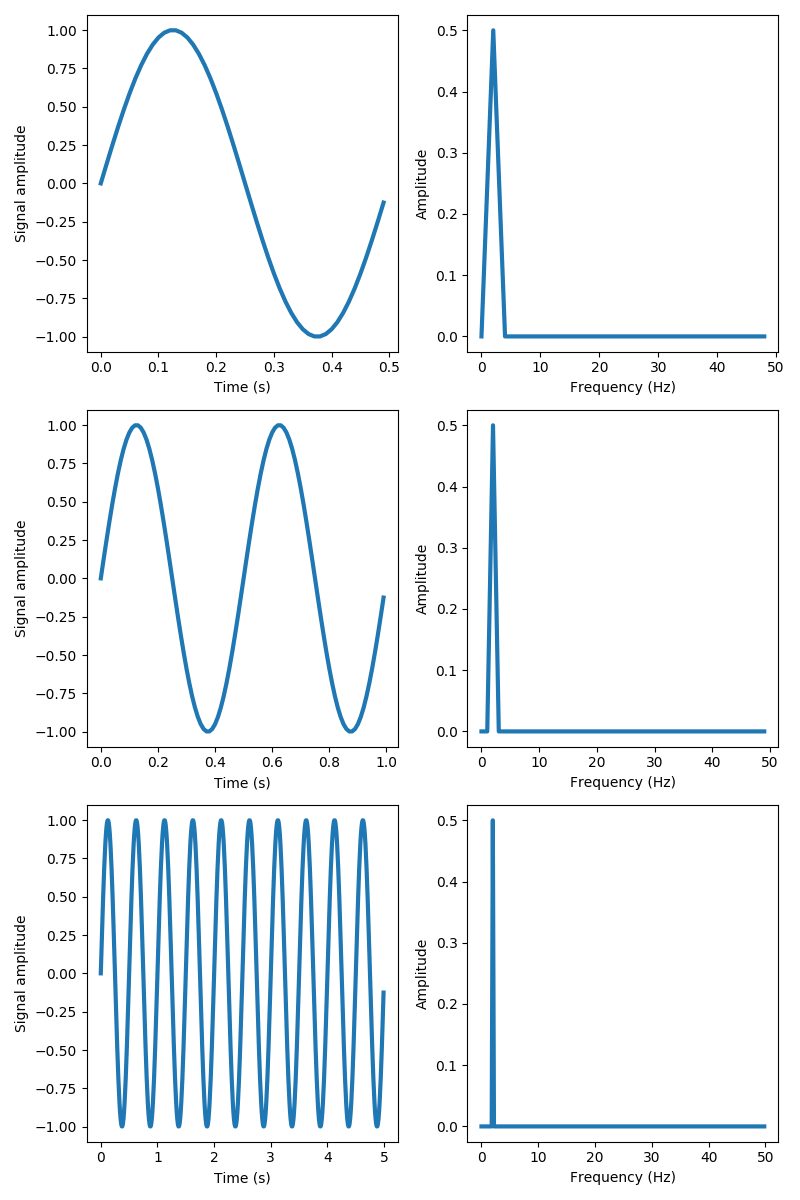

In [2]:

def run_fft(time, signal):
    """Do fft for the given signal.

    Parameters
    ----------
    time : numpy.array
        The times we have measured the signal at.
    signal : numpy.array
        The measured signal.

    Returns
    -------
    freq : numpy.array
        The positive frequencies.
    fourier : numpy.array
        The Fourier transform coefficients.
    amplitude : numpy.array
        The amplitude spectrum.
    power : numpy.array
        The power spectrum.

    """
    fourier = fft(signal)
    delta_t = time[1] - time[0]
    N = signal.size
    freq = fftfreq(N, delta_t)
    amplitude = np.abs(fourier / N)
    power = np.abs(fourier)**2
    # Normalize power:
    power = power / power.sum()
    return freq[:N//2], fourier, amplitude[:N//2], power[:N//2]

times = [np.arange(0, i, 0.01) for i in [0.5, 1, 5]]

fig, axs = plt.subplots(nrows=len(times), ncols=2, figsize=(8, 4*len(times)))

for time, axr in zip(times, axs):
    signal = np.sin(2.0 * 2.0 * np.pi * time)
    freq, _, amplitude, _ = run_fft(time, signal)
    axr[0].plot(time, signal, lw=3)
    axr[1].plot(freq, amplitude, lw=3)
    axr[0].set(xlabel='Time (s)', ylabel='Signal amplitude')
    axr[1].set(xlabel='Frequency (Hz)', ylabel='Amplitude')
fig.tight_layout()

**Answer to question 13.1(a):** The length in time increases the resolution of the fft amplitudes.

**(b)**  One "trick" we can do to increase the length of a signal is to
simply add zeros to the beginning and the end of the signal. This is
called "zero-padding", and we can do this with the method
[`pad`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.pad.html) 
from `numpy`:
`zero_pad = np.pad(signal, pad_width=250)`.  This will add $250$ zeros to
the beginning of the signal, and $250$ zeros to the end of the signal. Consider again
the signal you created in point (i) in part **13.1(a)** of this
exercise. Pad this signal by adding $250$ zeros to the beginning and $250$ zeros to
the end
of the signal, and calculate the FFT for the padded signal. Comparing this to
the non-padded version, what seems to
be the effect when you pad the signal?



<IPython.core.display.Javascript object>


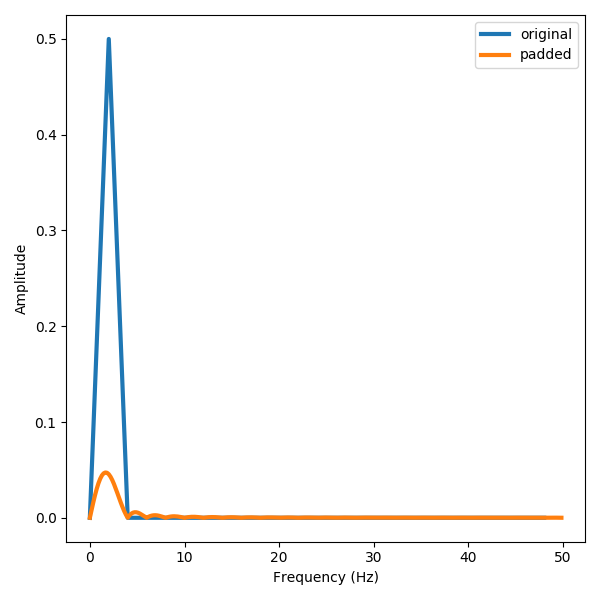

In [3]:
time = times[0]
signal = np.sin(2.0 * 2.0 * np.pi * time)
signal_pad = np.pad(signal, pad_width=250)


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
freq, _, amplitude, _ = run_fft(time, signal)
ax.plot(freq, amplitude, lw=3, label='original')
freqp, _, amplitudep, _ = run_fft(time, signal_pad)
ax.plot(freqp, amplitudep, lw=3, label='padded')
ax.set(xlabel='Frequency (Hz)', ylabel='Amplitude')
ax.legend()
fig.tight_layout()

**Answer to question 13.1(b):** The peak is repeated a couple times, and the amplitude lowers. Also the seems smoother as there are more datapoints in the frequency domain ([but the resolution has not increased](https://dsp.stackexchange.com/questions/11560/why-do-we-say-that-zero-padding-doesnt-really-increase-frequency-resolution)).

**(c)**  We will continue with the signal in Eq. 1, but this time we will
investigate the effect of changing the sampling frequency (i.e. the time step/how often
we measure the signal in time).
Create $4$ new versions of this signal:

* (i) from $0$ to $0.5$ (i.e. one period)
with a time step of $0.01$:

  `time = np.arange(0, 0.5, 0.01)`


* (ii) from $0$ to $0.5$ (i.e. one period)
with a time step of $0.005$:

  `time = np.arange(0, 0.5, 0.005)`


* (iii) from $0$ to $1$ (i.e. two periods)
with a time step of $0.125$:
  
  `time = np.arange(0, 1, 0.125)`


* (iv) from $0$ to $10$ (i.e. $20$ periods)
with a time step of $0.3$:
  
  `time = np.arange(0, 10, 0.3)`


Create these $4$ signals, calculate the FFT for each of
them, and compare the amplitude spectra. Based on your results, what seems
to be the effect of changing the sampling frequency? Can you explain the
results you obtain for the $4$th signal (point (iv) above)?



<IPython.core.display.Javascript object>


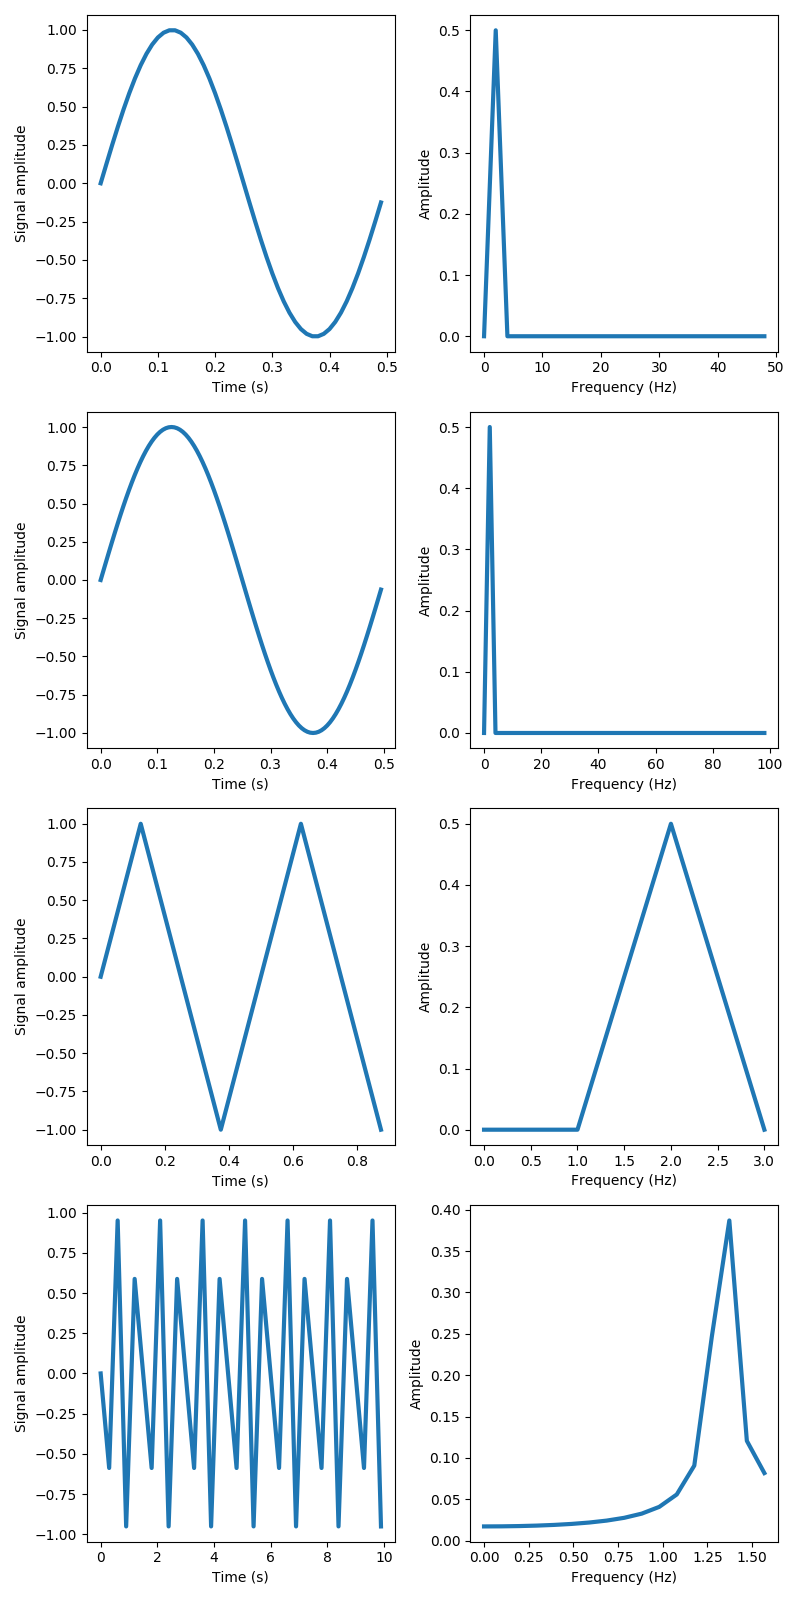

In [4]:
times = [np.arange(0, i, j) for i,j in zip((0.5, 0.5, 1, 10), (0.01, 0.005, 0.125, 0.3))]

fig, axs = plt.subplots(nrows=len(times), ncols=2, figsize=(8, 4*len(times)))

for time, axr in zip(times, axs):
    signal = np.sin(2.0 * 2.0 * np.pi * time)
    freq, _, amplitude, _ = run_fft(time, signal)
    axr[0].plot(time, signal, lw=3)
    axr[1].plot(freq, amplitude, lw=3)
    axr[0].set(xlabel='Time (s)', ylabel='Signal amplitude')
    axr[1].set(xlabel='Frequency (Hz)', ylabel='Amplitude')
fig.tight_layout()

**Answer to question 13.1(c):** The sampling frequency does not change the FFT spectrum, except for when the sampling frequency is less than half a period, then you get artifacts.

**(d)**  We will now consider a new signal which contains two frequencies:
\begin{equation}
y(t) = \sin (2 \times 2\pi t)
+ \sin (2.1 \times 2\pi t),
\label{eq:signal2}
\tag{2}\end{equation}

If you were to separate these two frequencies ($2$ and $2.1$) with the FFT method,
how long would you have to sample the signal for? Test this by
calculating the FFT of this signal (Eq. \eqref{eq:signal2}) and
plotting the amplitude spectrum.


<IPython.core.display.Javascript object>


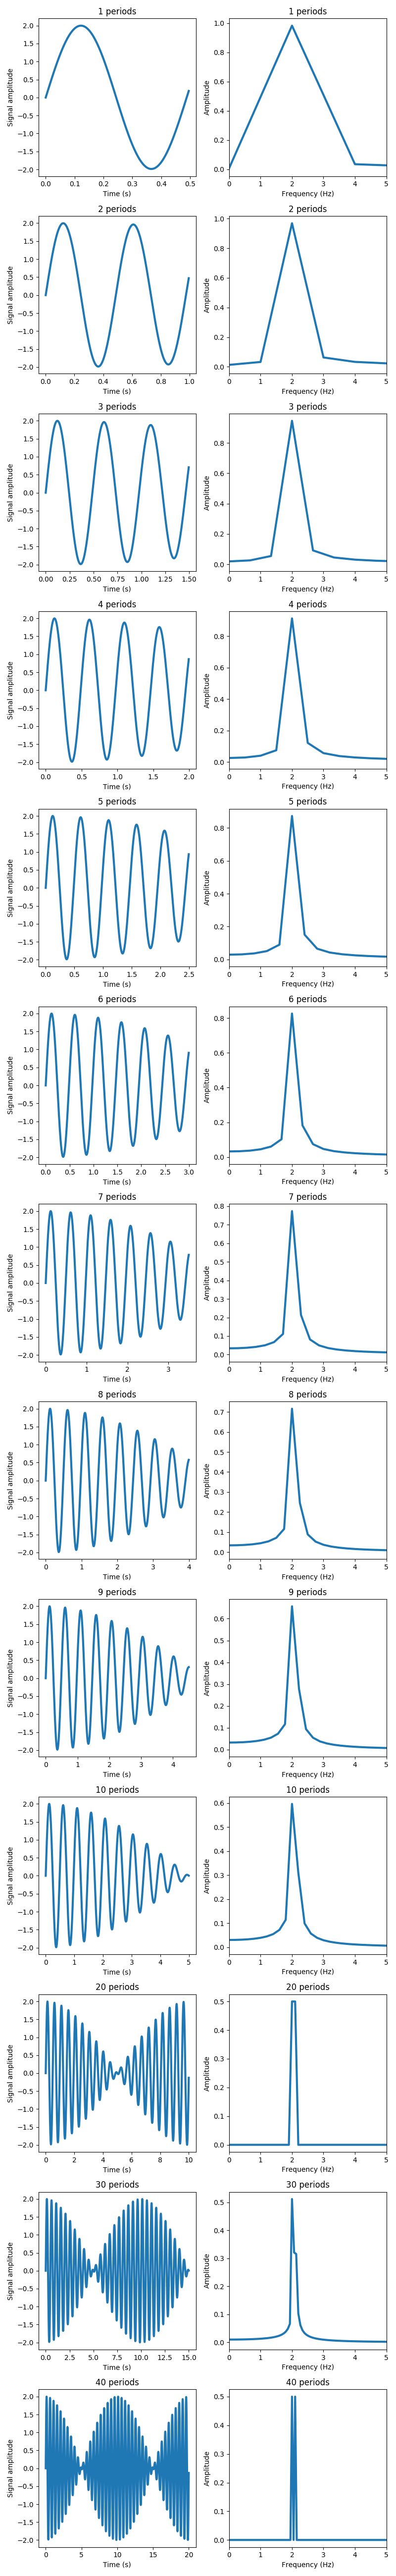

In [5]:
periods = list(range(1,11))
periods += [20, 30, 40]
times = [np.arange(0, 0.5*i, 0.005) for i in periods]

fig, axs = plt.subplots(nrows=len(times), ncols=2, figsize=(8, 4*len(times)))

for i, time, axr in zip(periods, times, axs):
    signal = np.sin(2.0 * 2.0 * np.pi * time)+np.sin(2.1 * 2.0 * np.pi * time)
    freq, _, amplitude, _ = run_fft(time, signal)
    axr[0].plot(time, signal, lw=3)
    axr[1].plot(freq, amplitude, lw=3)
    axr[0].set(xlabel='Time (s)', ylabel='Signal amplitude', title="{} periods".format(i))
    axr[1].set(xlabel='Frequency (Hz)', ylabel='Amplitude', title="{} periods".format(i), xlim=(0,5)) #zoom to the interesting part
fig.tight_layout()

**Answer to question 13.1(d):** After a full period of half the difference (1/0.05=20 s) the two peaks are base line seperated.


**Exercise 13.2**

The file `Data/unknown_signal.txt` contains a measurement
of a signal with noise. The first column are the times for which the signal was
measured, and the signal itself can be found in the second column. You know that this
signal, $y$, should have the following form as a function of time, $t$,

\begin{equation}
y(t) = a \sin (f_1 \times 2\pi t) + b \sin(f_2 \times 2\pi t),
\label{eq:signal2}
\tag{3}\end{equation}

where $a$ and $b$ are coefficients, and $f_1$ and $f_2$ are two
frequencies. Determine the coefficients and the two frequencies by
calculating the FFT of the given signal. 

Note: Since the FFT method will find
both negative and positive frequencies, you should also include the
negative frequencies. We can show that, in this case, this is effectively
the same as only 
considering the positive frequencies, but doubling the 
amplitudes.(This statement should be justified. One simple argument
is as follows. For Eq. \ref{eq:signal2}, the Fourier coefficients will be
purely imaginary. Further, the coefficients for a pair of frequencies, $f$ and $-f$,
will be complex conjugates of each other. The sum of the contributions for these
two frequencies will be $c_{f} \text{e}^{2\pi f t} + c_{-f} \text{e}^{-2 \pi f t}$,
where $c_f$ and $c_{-f}$ are the two coefficients.
Performing this summation results in  $2 A_f \sin (2 \pi f t)$,
where $A_f = \sqrt{||c_f||^2} = \sqrt{||c_{-f}||^2}$ is
the amplitude. Try to show this yourself, by using
[Euler's formula](https://en.wikipedia.org/wiki/Euler\%27s\_formula),
and assuming that $c_f=c_{-f}^\ast$ is purely imaginary (here "$^\ast$" denotes
the complex conjugate).)



<IPython.core.display.Javascript object>


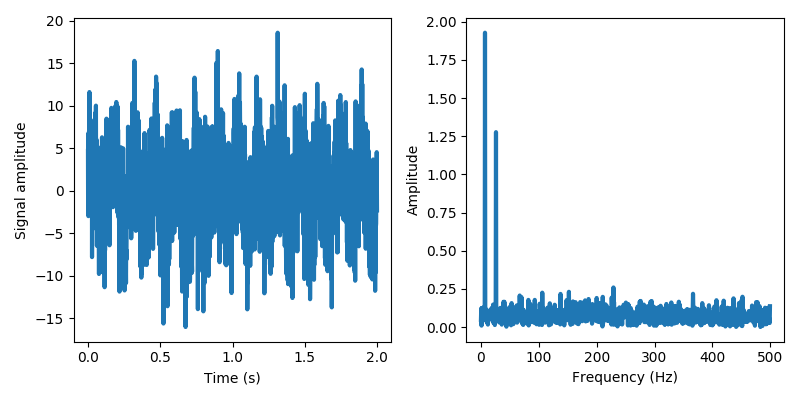

Formula = 3.8562752467246777*sin(7.0 ×2𝜋𝑡) + 2.553752756641592*sin(26.0 ×2𝜋𝑡)


In [6]:
data = np.loadtxt("Data/unknown_signal.txt")
time = data[:,0]
signal = data[:,1]

freq, _, amplitude, _ = run_fft(time, signal)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
axs = axs.flatten()
axs[0].plot(time, signal, lw=3)
axs[1].plot(freq, amplitude, lw=3)
axs[0].set(xlabel='Time (s)', ylabel='Signal amplitude')
axs[1].set(xlabel='Frequency (Hz)', ylabel='Amplitude')

fig.tight_layout()

fs = []
As = []
for f, amp in zip(freq, amplitude):
    if amp > 1: #look at the FFT plot for this cutoff
        
        fs.append(f)
        As.append(2*amp)

# Using the brackets with the numbers allows for reortdering in the strings
# and using the stars here unpacks the lists 
print("Formula = {2}*sin({0} ×2𝜋𝑡) + {3}*sin({1} ×2𝜋𝑡)".format(*fs, *As)) 

**Answer to question 13.2:** See the formula above.

**Exercise 13.3**

In the lectures, we have mentioned the song
[Scar tissue](https://open.spotify.com/track/1G391cbiT3v3Cywg8T7DM1?autoplay=true&v=T) 
by the Red Hot Chili Peppers (RHCP) and how one guitar string in the intro is apparently out of tune.
By nerdy inspection of RHCP music videos, we can see that the two first notes in the intro should be a
F note followed by a A note. However, the A note sounds slightly out of tune when comparing
a tuned guitar playing this note to the album version of the song. We
will here investigate if this is true and to what extent it is out of tune.


**(a)**  We will start by analyzing a known signal. The file `Data/440hz.txt.gz`
contains a sample of a A note at $440$ Hz. The first column of this file
is the time, and the second column is the sampled A note at the corresponding time.
Compute the FFT of this signal and verify that it contains the expected frequency.
Note: This file is compressed with
[gzip](https://en.wikipedia.org/wiki/Gzip) , but `numpy` can read this
file directly with the
[`loadtxt`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html)  
method: `np.loadtxt("Data/440hz.txt.gz")`



<IPython.core.display.Javascript object>


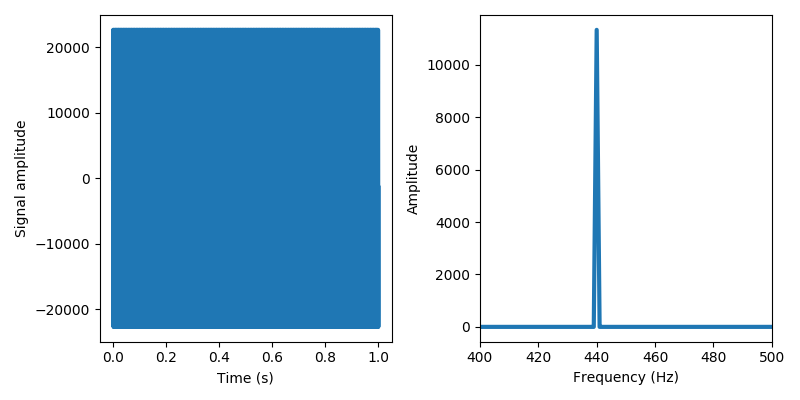

In [7]:
data = np.loadtxt("Data/440hz.txt.gz")
time = data[:,0]
signal = data[:,1]

freq, _, amplitude, _ = run_fft(time, signal)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
axs = axs.flatten()
axs[0].plot(time, signal, lw=3)
axs[1].plot(freq, amplitude, lw=3)
axs[0].set(xlabel='Time (s)', ylabel='Signal amplitude')
axs[1].set(xlabel='Frequency (Hz)', ylabel='Amplitude', xlim=(400,500))

fig.tight_layout()


**Answer to question 13.3(a):** Zooming in on the FFT plot shows a nice peak at 440 Hz.

**(b)** A recording of the first few seconds of
[Scar tissue](https://open.spotify.com/track/1G391cbiT3v3Cywg8T7DM1?autoplay=true&v=T) 
is shown in Fig 1. We will here focus on two parts of the signal, as
highlighted in the figure. In the first part of the signal, we expect to mainly
find the F note at $174.61$ Hz and harmonics which are multiples of this
frequency, for instance, $349.23\,\text{Hz} = 2 \times 174.61\,\text{Hz}$, and
$698.46\,\text{Hz} = 4 \times 174.61\,\text{Hz}$.(A table of notes and
frequencies can be found [here](https://pages.mtu.edu/suits/notefreqs.html))

In the second part of the signal, we expect to still find the F note, but also
the possible A note at $440$ Hz, as this is approximately when that note is
played. We will now try to identify the second note by comparing the
amplitude spectra obtained by taking the Fourier transform of the two parts separately.

* (i)  Calculate the FFT of the first part. The recording of this part
can be found in the file `Data/sc_part1.txt.gz` where the first
column is the time and the second column is the amplitude. Can you find
the F note in this signal?

* (ii)  Calculate the FFT of the second part.
The recording of this part
can be found in the file `Data/sc_part2.txt.gz` where the first
column is the time and the second column is the amplitude. Can you still find
the F note in this signal?

* (iii)  Compare the two amplitude spectra you have obtained. For your comparison,
it might be helpful to normalize the spectra so that the largest amplitude
is equal to $1$ in both spectra. When you compare the two spectra, can you
see a difference around $440$ Hz? Estimate the frequency
associated with the largest amplitude close to $440$ Hz in the amplitude
spectrum of part (ii).

![scar.png](Figures/scar.png)

**Figure 1:** (Left) Amplitude in a recording of Scar Tissue as a function of time. (Right-top)
The first part (color red) of the signal we will analyze. (Right-bottom)
The second part (color red) of the signal we will analyze.


<IPython.core.display.Javascript object>


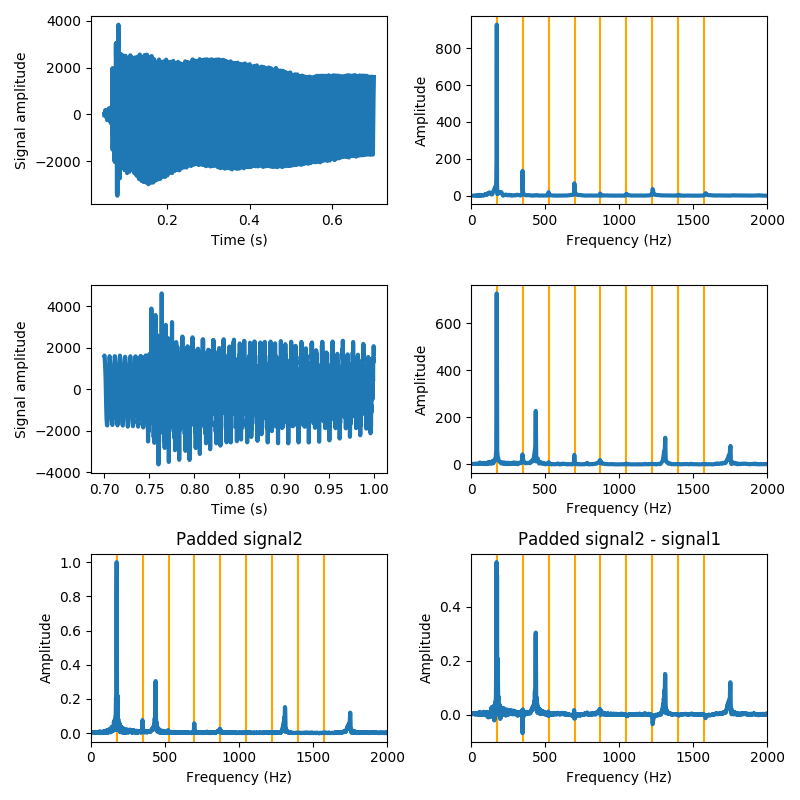

(i) Highest amplitude frequency: 173.85221881106193
(ii) Highest amplitude frequency: 173.34643586051288
(iii) Highest amplitude frequency: 436.92307692283396


In [8]:
data1 = np.loadtxt("Data/part1.txt.gz")
data2 = np.loadtxt("Data/part2.txt.gz")

time1 = data1[:,0]
signal1 = data1[:,1]

time2 = data2[:,0]
signal2 = data2[:,1]

signal3 = np.pad(signal2, pad_width=((len(signal1)-len(signal2)+1)//2))

freq1, _, amplitude1, _ = run_fft(time1, signal1)
freq2, _, amplitude2, _ = run_fft(time2, signal2)
freq3, _, amplitude3, _ = run_fft(time2, signal3)


amplitude4 = (amplitude3/amplitude3.max()) - (amplitude1/amplitude1.max())


fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(8, 8))

axs[0][0].plot(time1, signal1, lw=3)
for i in range(1,10):
    axs[0][1].axvline(i*174.61, color='orange')
axs[0][1].plot(freq1, amplitude1, lw=3)
axs[0][0].set(xlabel='Time (s)', ylabel='Signal amplitude')
axs[0][1].set(xlabel='Frequency (Hz)', ylabel='Amplitude', xlim=(0,2000))

axs[1][0].plot(time2, signal2, lw=3)
for i in range(1,10):
    axs[1][1].axvline(i*174.61, color='orange')
axs[1][1].plot(freq2, amplitude2, lw=3)
axs[1][0].set(xlabel='Time (s)', ylabel='Signal amplitude')
axs[1][1].set(xlabel='Frequency (Hz)', ylabel='Amplitude', xlim=(0,2000))

for i in range(1,10):
    axs[2][0].axvline(i*174.61, color='orange')
axs[2][0].plot(freq3, amplitude3/amplitude3.max(), lw=3)
axs[2][0].set(xlabel='Frequency (Hz)', ylabel='Amplitude', xlim=(0,2000), title='Padded signal2')

for i in range(1,10):
    axs[2][1].axvline(i*174.61, color='orange')
axs[2][1].plot(freq3, amplitude4, lw=3)
axs[2][1].set(xlabel='Frequency (Hz)', ylabel='Amplitude', xlim=(0,2000), title='Padded signal2 - signal1')

fig.tight_layout()

# Select window
window = np.where((430<freq3) & (freq3 < 450))
freq_window = freq3[window]
amp_window = amplitude4[window]
point = np.where(amp_window == amp_window.max())

highest_freq = freq_window[point][0]

window = np.where((0<freq1) & (freq1 < 450))
freq_window = freq1[window]
amp_window = amplitude1[window]
point = np.where(amp_window == amp_window.max())

highest_freqf1 = freq_window[point][0]

window = np.where((0<freq2) & (freq2 < 450))
freq_window = freq2[window]
amp_window = amplitude2[window]
point = np.where(amp_window == amp_window.max())

highest_freqf2 = freq_window[point][0]


print("(i) Highest amplitude frequency: {}".format(highest_freqf1))
print("(ii) Highest amplitude frequency: {}".format(highest_freqf2))
print("(iii) Highest amplitude frequency: {}".format(highest_freq))

**Answer to question 13.3(b):** 
(i) There is a slight difference between the note (173.852) and a pure F (174.61). 
(ii) The F note is shifted slightly more (173.346) in comparison to a pure F (174.61)
The difference to F of (i) is to small to notice for me (see the next question), but not for question (ii).
(iii) There is an extra frequency in the 440 Hz range (and triple/quadruple that). But the real peak is at 436.923 Hz.

**(c)**  Would you say that the frequency you identified above in part **13.3(b)**&ndash;(iii)
is out of tune with respect to the expected A note at $440$ Hz? Since we are, after all, at a
technical university, we can try to quantify this by calculating 
the number of cents measuring the interval between the two frequencies.
The number of cents, $n$, is a unit of measure for the ratio
between two frequencies, $f_1$ and $f_2$,
\begin{equation}
n = 1200 \times \log_2 \frac{f_1}{f_2},
\tag{4}\end{equation}

and
[Wikipedia](https://en.wikipedia.org/wiki/Cent\_(music)\#Human_perception)  states that
we can distinguish a difference in pitch of about $5$&ndash;$6$ cents. Calculate the number
of cents for the two frequencies $f_1 = 440\,\text{Hz}$ and $f_2$ equal to the
frequency you identified above, and use this to support your conclusion.
Further, Wikipedia gives a [Just-noticeable difference](https://en.wikipedia.org/wiki/Just-noticeable_difference) of 3 Hz for frequencies below 500 Hz for
simple tones, and you can also use this to support your conclusion.


In [9]:
questions = ('(i)', '(ii)', '(iii)')
f1s = (174.61, 174.61, 440)
f2s = (highest_freqf1, highest_freqf2, highest_freq)

for f1, f2, q in zip(f1s, f2s, questions):
    n = 1200 * np.log2(f1/f2)
    print("{} Difference is {} cents".format(q, n))

(i) Difference is 7.5296465053414545 cents
(ii) Difference is 12.5736135429254 cents
(iii) Difference is 12.149060729411516 cents


**Answer to question 13.3(c):**
For (i) the difference is 7.53 cents, which is to small for me to notice.

While for (ii) and (iii): The difference is 12 cents so that is double the required difference stated by wikipedia. So yes, the note is out of tune with respect to a pure F or pure A respectively.